In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [27]:
# function to parse through the data
def parse_csv(file_name: str):
    data = pd.read_csv(file_name)
    e = np.array([])
    N = np.array([])
    for i in range(10):
        e = np.append(e, data.e.iloc[i])
        N = np.append(N, data.avg_steps.iloc[i])
    return e, N

# function to plot the figure 
def plot(x, y, title, xlabel='e: the tolerated error', ylabel='N: timestep till random'):
    plt.ion()
    plt.figure()
    plt.plot(x, y, 'o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
# compute the Mean square error of this fit 
def calculate_mse(f, a, b, xdata, ydata):
    mse = 0
    for i in range(len(xdata)):
        mse += (ydata[i] - f(xdata[i], a, b))**2
    mse = mse / len(xdata)
    return mse


# create a function to fit the data to a specific kind of function
def fit(f,x,y):
    # fit the data
    params, cov = curve_fit(f=f, xdata=x, ydata=y, p0=[1,1], bounds=(-np.inf, np.inf))
    std_deviation = np.sqrt(np.diag(cov))
    print('the parameter a, b are: ', params)
    print('the standard deviation of a, b are: ', std_deviation)
    # print('the covariance matrix of a, b is: ')
    # print(cov)

    # plot the fit
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, f(x, params[0], params[1]), label='fit')
    plt.legend()

    # calculate the mean square error
    mse = calculate_mse(f, params[0], params[1],x,y)
    print('the mean square error is: ', mse)
    
# the inverse function 
def inverse(x, a, b):
    return a / x**b  # y = (a/x^b)

# the logarithm function
def logfunction(x, a, b):
    return a * np.log(x) + b # y = alogx+b

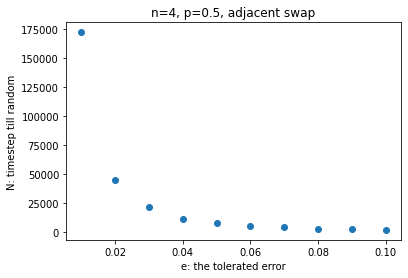

the parameter a, b are:  [ -61778.78118345 -163749.06640705]
the standard deviation of a, b are:  [12905.86543265 40936.09261166]
the mean square error is:  644381380.7094269


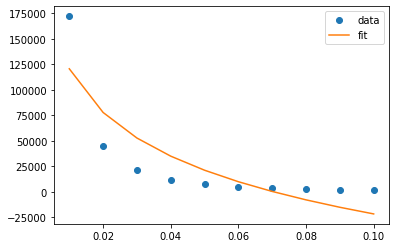

In [28]:
e1, N1 = parse_csv("epsilon_t.csv")
plot(e1, N1, title='n=4, p=0.5, adjacent swap')
fit(logfunction, e1, N1)

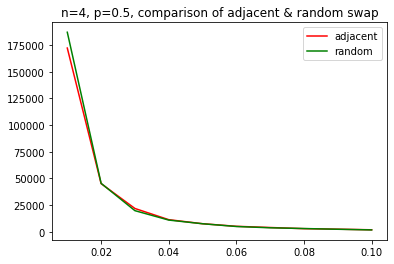

In [29]:
e1, N1 = parse_csv("epsilon_t.csv")
e2, N2 = parse_csv("epsilon_t1.csv")
plt.ion()
plt.figure()
plt.title("n=4, p=0.5, comparison of adjacent & random swap")
plt.plot(e1, N1, 'r', label="adjacent")
plt.plot(e2, N2, 'g', label="random")
plt.legend()
plt.show()